Energy Consumption

We are considering a dataset on energy consumption where each point is link to a timestamp  

THE GROUP MEMBERS ARE;

CHIDERA UZOR EJIFOR 10373143

BANKOLE TEMITAYO OGUNGBESAN - 10391228

DANIEL AGBANIYAKA 10386357

A Time series is a collection of data points indexed, listed or graphed in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is sequence of discrete-time data.
Energy Data - Readings in KWh for a sample of london Households that took part in the UK power Networks led low carbon london projects between November 2011 and February 2014. An Exploratory and interactive analysis will be made on this Data set to to ge an idea of the structure and ranges.

In [2]:
## Replace with your credentials.
# import plotly
# plotly.tools.set_credentials_file(username='########', api_key='******')

## Offline mode
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Standard data science libraries
import pandas as pd
import numpy as np

# Plot imports
import plotly.plotly as py
import plotly.graph_objs as go

# Visualization import
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
from pandas import Series
from matplotlib import pyplot

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [19]:
# Read in data and convert index to a datetime
df = pd.read_csv('Anaconda3\Energy2.csv')#, header=0)
df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)
df.head()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour),Acorn,Acorn_grouped,Steam
1970-01-01 00:00:00.000000000,MAC003718,Std,17/10/2012 13:00,0.09,ACORN-A,Affluent,21.33
1970-01-01 00:00:00.000000001,MAC003718,Std,17/10/2012 13:30,0.16,ACORN-A,Affluent,21.33
1970-01-01 00:00:00.000000002,MAC003718,Std,17/10/2012 14:00,0.212,ACORN-A,Affluent,21.33
1970-01-01 00:00:00.000000003,MAC003718,Std,17/10/2012 14:30,0.145,ACORN-A,Affluent,21.33
1970-01-01 00:00:00.000000004,MAC003718,Std,17/10/2012 15:00,0.104,ACORN-A,Affluent,28.28


In [27]:
df['date'] = pd.to_datetime(df['DateTime'])
data = df.loc[:, ['KWH/hh (per half hour) ']]
data = data.set_index(df.date)
data['KWH/hh (per half hour) '] = pd.to_numeric(data['KWH/hh (per half hour) '],
downcast = 'float', errors = 'coerce')

In [5]:
Energy_data = data.head()

In [6]:
Energy_data

,KWH/hh (per half hour)
date,
2012-10-17 13:00:00,0.090
2012-10-17 13:30:00,0.160
2012-10-17 14:00:00,0.212
2012-10-17 14:30:00,0.145
2012-10-17 15:00:00,0.104


The following graph below shows an Energy time plot which KWh 
is plotted against date. From the plot below we can see that 
the year 2012 represents low energy supply through the year.From 2013 to 2014
shows a constant Energy supply

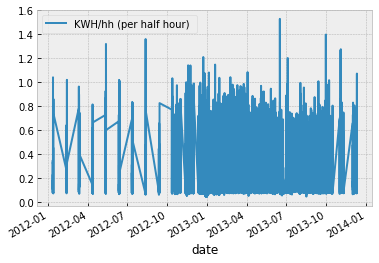

In [21]:
Energy_data = data.plot()

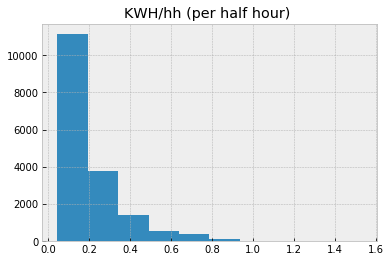

In [22]:
Energy_data = data.hist()

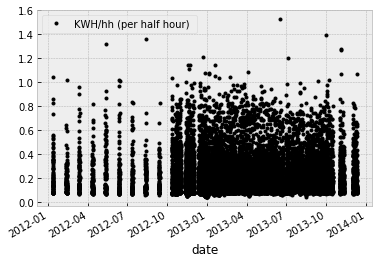

In [28]:
data.plot(style='k.')

In [23]:
df['date'] = pd.to_datetime(df['DateTime'])
data = df.loc[:, ['Steam']]
data = data.set_index(df.date)
data['Steam'] = pd.to_numeric(data['Steam'],
downcast = 'float', errors = 'coerce')

In [9]:
Steam_data = data.head()

In [10]:
Steam_data 

,Steam
date,
2012-10-17 13:00:00,21.330000
2012-10-17 13:30:00,21.330000
2012-10-17 14:00:00,21.330000
2012-10-17 14:30:00,21.330000
2012-10-17 15:00:00,28.280001


This graph below show a steam represention across the year.  It ploted against time. There was fluctuation in Steam from 2012 january to october
and remained constant at 15 kw from  2013 to 2014

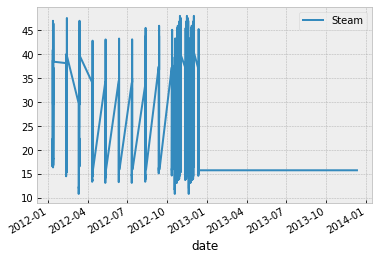

In [24]:
Steam_data = data.plot()

Now to plot a Python histogram, we can try the hist() method.

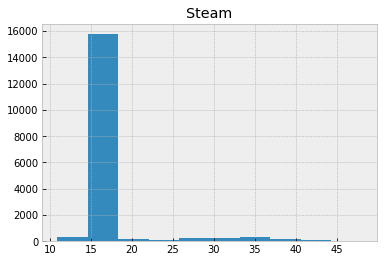

In [25]:
Steam_data = data.hist()

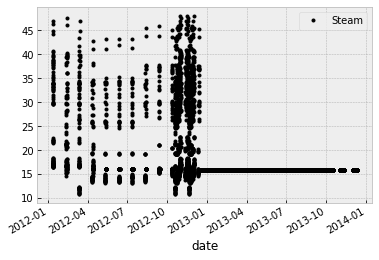

In [26]:
data.plot(style='k.')

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.



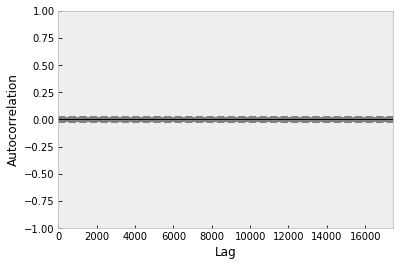

In [29]:
#This gives us how the elements of the series correlate to each other.

from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(data)

Such a plot tells us whether a time series is random. If you can identify a structure in the plot, the data isn’t random.

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.



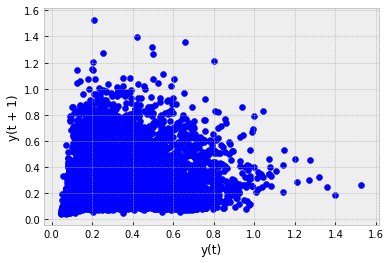

In [30]:


from pandas.tools.plotting import lag_plot
lag_plot(data)

What if we want to find out the density of the rate values for the entire week?

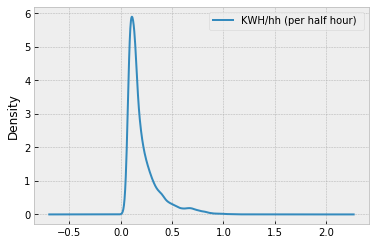

In [31]:


data.plot(kind='kde')

To get more insight from the proposed data A term resampling will be made 
on the dataset

Resampling involves changing the frequency of the time series observation. 
This can be used to add additional structure and insight to the data

We could start with weekly summary

This graph below gives us a better insight weekly on Energy consumption
Moreover, as the previous graph describes, it shows that Energy consumption
from January 2012 to August recorded less than 40 KWh, Then shot up in October
to about 80KWh which then remained constantin 2013 from january to october.


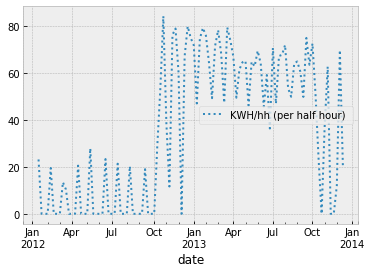

In [32]:

weekly = data.resample('w').sum()
weekly.plot(style = [':', '--', '-'])

So let take a look at thesame data for a daily suummary and we can 
use a groupby and mean function for hourly summary

From the Daily plotted graph below we can see that from january to october the Energy
consumption was abt 40KWh which remaind constant and rose by the end of october
it the fluctuarte in 2013 accross the year

daily = data.resample('D').sum()
daily.plot()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])


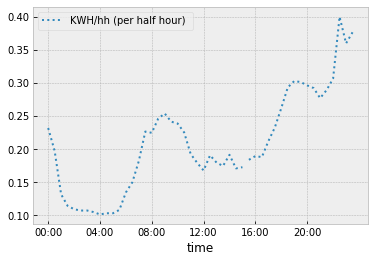

In [33]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks = hourly_ticks, style = [':', '--', '-'])

Lets try and plot for date

In [34]:


mon = df['date']
temp = pd.DatetimeIndex(mon)
month = pd.Series(temp.month)
to_be_plotted = df.drop(['date'], axis = 1)
to_be_plottted = to_be_plotted.join(month)

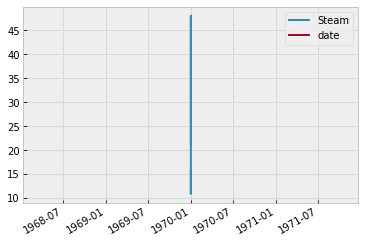

In [35]:

to_be_plottted.plot()

In [36]:
head = df['KWH/hh (per half hour) '].head()

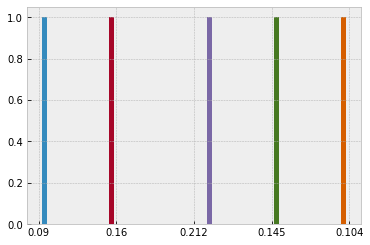

In [37]:
head.hist()

Text(0.5, 1.0, 'Energy consumption')

Text(0, 0.5, 'Date')

Text(0.5, 0, 'Energy')

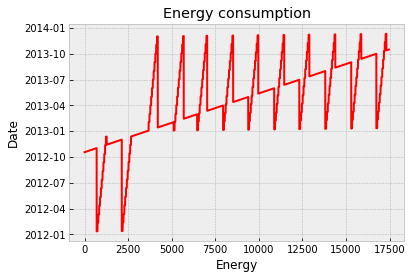

In [38]:
plt.plot(data.index,'r')# data['Adj. Close'])
plt.title('Energy consumption')
plt.ylabel('Date');
plt.xlabel('Energy');
plt.show()




The graph is plot against date and Energy with a zig zag fluctuation in energy consumption 